In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/drinks.csv"
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [2]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [3]:
corr = drinks[['beer_servings','wine_servings']].corr(method="pearson")
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [4]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


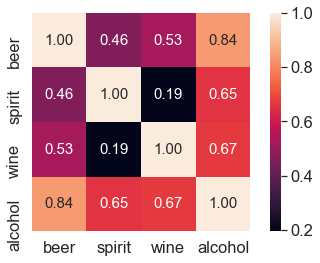

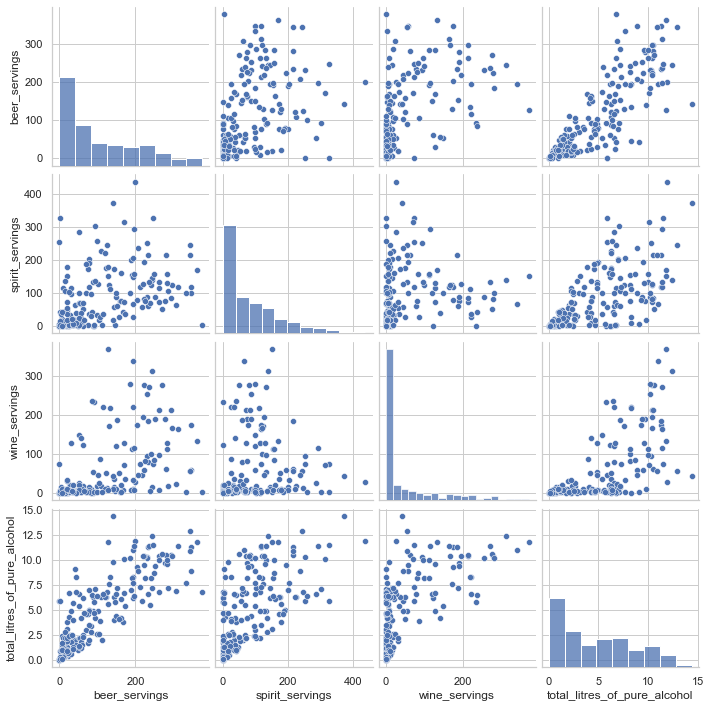

In [5]:
import seaborn as sns
cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,cbar=True,annot = True,square = True,fmt = ".2f",annot_kws = {"size" : 15},yticklabels = cols_view,xticklabels = cols_view)
plt.tight_layout()
plt.show()

sns.set(style = "whitegrid",context = "notebook")
sns.pairplot(drinks[cols],height=2.5)
plt.show()

In [6]:
drinks['continent'] = drinks['continent'].fillna("OT")
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [7]:
del drinks['contient']

KeyError: 'contient'

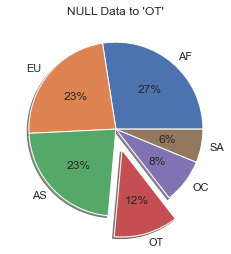

In [ ]:
labels = drinks["continent"].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)
plt.pie(fracs1,explode=explode,labels=labels,autopct="%.0f%%",shadow=True)
plt.title("NULL Data to \'OT\'")
plt.show()

In [ ]:
print(labels,fracs1)

['AF', 'EU', 'AS', 'OT', 'OC', 'SA'] [53, 45, 44, 23, 16, 12]


In [ ]:
result = drinks.groupby("continent")["spirit_servings"].agg(['mean','max','min','sum'])
result.head()

,mean,max,min,sum
continent,,,,
AF,16.339623,152,0,866
AS,60.840909,326,0,2677
EU,132.555556,373,0,5965
OC,58.437500,254,0,935
OT,165.739130,438,68,3812


In [ ]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby("continent").total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [ ]:
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax()
beer_continent

'EU'

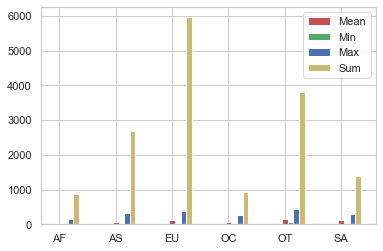

In [ ]:
n_groups = len(result.index)
means = result["mean"].tolist()
mins = result["min"].tolist()
maxs = result["max"].tolist()
sums = result["sum"].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rect1 = plt.bar(index,means,bar_width,color = 'r',label = "Mean")
rect2 = plt.bar(index + bar_width,mins,bar_width,color = 'g',label = "Min")
rect3 = plt.bar(index + bar_width * 2,maxs,bar_width,color = 'b',label = "Max")
rect4 = plt.bar(index + bar_width * 3,sums,bar_width,color = 'y',label = "Sum")

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show()


In [ ]:
continents = continent_mean.index.tolist()
continents.append('MEAN')
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'MEAN']

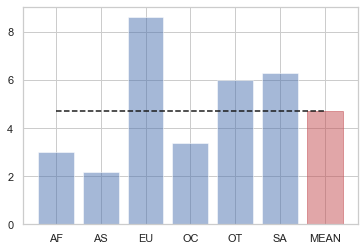

In [ ]:
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
bar_list = plt.bar(x_pos,alcohol,align="center",alpha = 0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0,6],[total_mean,total_mean],'k--')
plt.xticks(x_pos,continents)
plt.show()

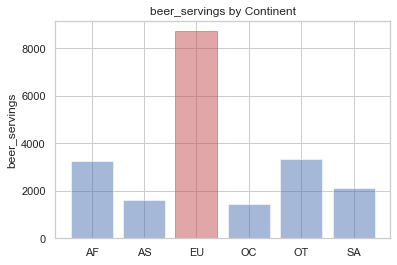

In [ ]:
beer_group = drinks.groupby("continent")['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos,alcohol,align = 'center',alpha = 0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos,continents)
plt.ylabel("beer_servings")
plt.title("beer_servings by Continent")
plt.show()


In [8]:
africa = drinks.loc[drinks['continent'] == "AF"]
europe = drinks.loc[drinks['continent'] == "EU"]

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'],equal_var = False)

print(tTestResult,tTestResultDiffVar)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11) Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


In [10]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings']+drinks['spirit_servings']
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'],ascending = 0)
country_with_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


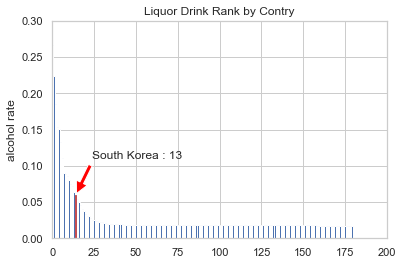

In [15]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
bar_list = plt.bar(x_pos,rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel("alcohol rate")
plt.title("Liquor Drink Rank by Contry")
plt.axis([0,200,0,0.3])
korea_rank = country_list.index("South Korea")
korea_alc_rank = country_with_rank[country_with_rank['country'] == "South Korea"]['alcohol_rate'].values[0]
plt.annotate("South Korea : " +str(korea_rank-1),xy = (korea_rank,korea_alc_rank),xytext = (korea_rank+10,korea_alc_rank+0.05),arrowprops = dict(facecolor = 'red',shrink = 0.05))
plt.show()

138    0.059394
Name: alcohol_rate, dtype: float64